<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/Origin_KD_N_L0_2grids_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.0, 8.0)

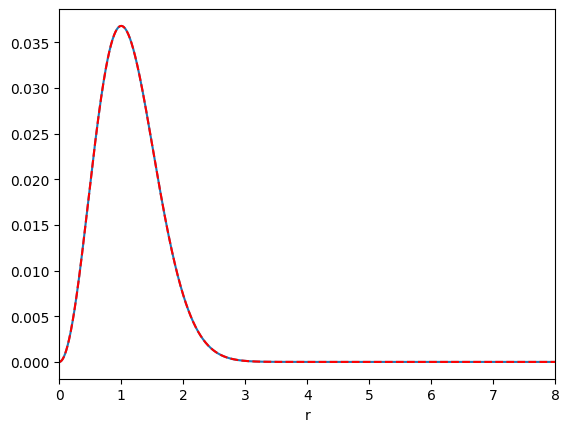

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

N = 30                                           # Truncation ordem

L0 = 3                                             # Map parameter 

col1 = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))        # Collocation points w origin included - CGL - Grid 1
col2 = np.cos((2*(np.arange(2*N + 3))+1)*math.pi /(2*(2*N + 2)+2))      # Collocation points w origin not included - CG - Grid 2 (Verificado)      
                                
    
colr1 = col1[1:N+2]             
colr2 = col2[0:N+1] 

# Physical domain  

r_2 = L0 * colr2/(np.sqrt(1-colr2**2))                    
r1 = L0 * colr1/(np.sqrt(1-colr1**2))                    

r = np.flip(r1)     # rearrange the points in a crescent order                                       
r2 = np.flip(r_2)

# Base Matrix (Chebyshev Polinomials TB_2n):

# Grid 1 (CGL)

TB = np.zeros([N+3,N+1])
rTB = np.zeros([N+3,N+1])
rrTB = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB[i,] = np.cos((2*i)*np.arctan(L0/r)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r)))/(L0**2 + r**2)

for i in range(N+3):   
  rrTB[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r)) + r*np.sinh(2*np.arctan(L0/r))))/(L0**2 + r**2)**2

# Grid 2 (CG):

TB_2 = np.zeros([N+3,N+1])
rTB_2 = np.zeros([N+3,N+1])
rrTB_2 = np.zeros([N+3,N+1])

for i in range(N+3):                                    # TB[:,0] = function in origin
  TB_2[i,] = np.cos((2*i)*np.arctan(L0/r2)) 

for i in range(N+3):                                    # TB[:,0] = function in origin
  rTB_2[i,] = -(2*L0*np.sinh(2*np.arctan(L0/r2)))/(L0**2 + r2**2)

for i in range(N+3):   
  rrTB_2[i,] = (4*L0*(L0*np.cosh(2*np.arctan(L0/r2)) + r2*np.sinh(2*np.arctan(L0/r2))))/(L0**2 + r2**2)**2


# Base Matrix (Rational Tchebyshev Polinomials SB_2n):

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)           

# Base Matrix (Rational Tchebyshev Polinomials SB_2n+1): 

# Grid 1 (CGL):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


# Base function in Grid 1:

psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]


# Grid 2 (CG):

SB_2 = np.zeros([N+2,N+1])
rSB_2 = np.zeros([N+2,N+1])
rrSB_2 = np.zeros([N+2,N+1])

for i in range(N+1+1):                                    # SB2[:,0] = function not in origin
  SB_2[i,] = np.sin((2*i+1)*np.arctan(L0/r2))                                                  

for i in range(N+1+1):
  rSB_2[i,] = -np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**2*(1+L0**2/r2**2)) 

for i in range(N+1+1):
  rrSB_2[i,] = -np.sin((2*i+1)*np.arctan(L0/r2))*(2*i+1)**2*L0**2/(r2**4*(1+L0**2/r2**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0/(r2**3*(1+L0**2/r2**2))-2*np.cos((2*i+1)*np.arctan(L0/r2))*(2*i+1)*L0**3/(r2**5*(1+L0**2/r2**2)**2)                     

# Base function in Grid 2:

psi_2 = SB_2[0:N+1,:]        # origin not included in psi_2[:,0]
rpsi_2 = rSB_2[0:N+1,:]
rrpsi_2 = rrSB_2[0:N+1,:]
            

# Initial conditions of Phi (Scalar field):                                    

r0 = 0

A0 = 0.05        # 0.90814 -> Disperse;  #    0.908145    -> AH      (Scalar field amplitude)

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))      # Phi initial data w/ origin included (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

# Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]


Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)

#plt.show()


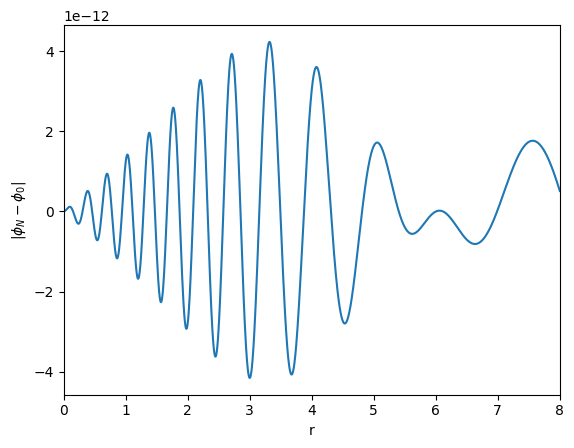

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0 - 1, inv_psi)


# Initial conditions for Pi:

# Equation for Krr: momentum constraint

# Initial values of Krr and K: Base functions of Krr and K

# Grid 1: 

SB1 = 1/2*(TB[2:(N+3),:] - TB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rTB[2:(N+3),:] - rTB[0:(N+1),:])
rrSB1 = 1/2*(rrTB[2:(N+3),:] - rrTB[0:(N+1),:])

# Grid 2: 

SB1_2 = 1/2*(TB_2[2:(N+3),:] - TB_2[0:(N+1),:])         
rSB1_2 = 1/2*(rTB_2[2:(N+3),:] - rTB_2[0:(N+1),:])
rrSB1_2 = 1/2*(rrTB_2[2:(N+3),:] - rrTB_2[0:(N+1),:])

K0 = A0/20*r2**2*(np.exp(-(r2)**2/sigma**2) + np.exp(-(r2)**2/sigma**2))

inv_SB1_2 = np.linalg.inv(SB1_2)

# Initial values for K:

fk0 = np.dot(K0, inv_SB1_2)

K = np.dot(fk0, SB1)

# Base functions of Pi:

TB1 = 1/2*(TB[1:(N+2),:] - TB[0:(N+1),:])         
rTB1 = 1/2*(rTB[1:(N+2),:] - rTB[0:(N+1),:])
rrTB1 = 1/2*(rrTB[1:(N+2),:] - rrTB[0:(N+1),:])


TB1_2 = 1/2*(TB_2[1:(N+2),:] - TB_2[0:(N+1),:])         
rTB1_2 = 1/2*(rTB_2[1:(N+2),:] - rTB_2[0:(N+1),:])
rrTB1_2 = 1/2*(rrTB_2[1:(N+2),:] - rrTB_2[0:(N+1),:])

inv_TB1 = np.linalg.inv(TB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, inv_TB1)
Pi = np.dot(b0, TB1)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d/dr 

tol = 1e-19
n = 0
nf = 100

# Newton Raphson loop

while n <= nf:  
  Chi = np.dot(c0, psi)  
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2 + np.exp(4*Chi[0])*K[0]/4 - 1/2*np.exp(4*Chi[0])*(Pi[0]**2 + np.exp(-4*Chi[0])*rPhi[0]**2)
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 - np.exp(4*Chi[1:N+1])*K[1:N+1]/4 + 1/2*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2)
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*K0[1:N+1]/4 - 2*psi[:,1:N+1]*np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) + 1/2*np.exp(4*Chi[1:N+1])*(4*psi[:,1:N+1]*np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]**2) 
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  n = n + 1


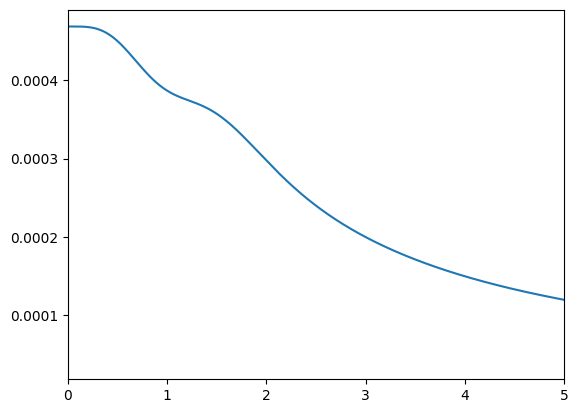

In [4]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [5]:

# Base functions for Beta

# Grid 1

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])


for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                 

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))   

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


# Grid 2

SB2_2 = np.zeros([N+1,N+1])      
rSB2_2 = np.zeros([N+1,N+1])
rrSB2_2 = np.zeros([N+1,N+1])



for i in range(N+1):                                                   # VERIFICADO
  SB2_2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r2))                                                  


for i in range(N+1):
  rSB2_2[i,] = -np.cos((2*i+2)*np.arctan(L0/r2))*(2*i+2)*L0/(r2**2*(1+L0**2/r2**2))


for i in range(N+1):
  rrSB2_2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)












In [6]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qSB[1:(N+2),:] + qrrSB[0:(N+1),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [7]:
# Filtering

Nc = 200

Nf = N - Nc

coef_f = 36
s = 20

filter1 = np.ones(N+1)
filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter2 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc))/(N-Nc))**s)))

In [8]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 9

It = int(tf/h)

t = 0

epsilon0 = 0.5
eta0 = 0.3

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, TB1)   
  rPi= np.dot(b0, rTB1)
    
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi) 

  Phi_2 = np.dot(a0, psi_2)
  rPhi_2 = np.dot(a0, rpsi_2)  
  
  Pi_2 = np.dot(b0, TB1_2)  
    
  Chi_2 = np.dot(c0, psi_2)
  rChi_2 = np.dot(c0, rpsi_2)  
  
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)  
  rrAlpha = np.dot(al0, rrpsi)

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1)

  Alpha_2 = 1 + np.dot(al0, psi_2)
  
  K_2 = np.dot(fk0, SB1_2) 
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) 
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)                
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)

   
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)   
  
    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(coeforigin, al0))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(coeforigin, a0) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)
  

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(phi_0))
  out_p.write(',\n')
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)      
  rPhi = np.dot(a0 + L1/2, rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)

  Pi = np.dot(b0 + N1/2, TB1)   
  rPi= np.dot(b0 + N1/2, rTB1)
    
  Chi = np.dot(c0 + K1/2, psi) 
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi) 

  Phi_2 = np.dot(a0 + L1/2, psi_2)
  rPhi_2 = np.dot(a0 + L1/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N1/2, TB1_2)  
    
  Chi_2 = np.dot(c0 + K1/2, psi_2)
  rChi_2 = np.dot(c0 + K1/2, rpsi_2)  
    
  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)  
  rrAlpha = np.dot(al0 + M1/2, rrpsi)

  K = np.dot(fk0 + P1/2, SB1)
  rK = np.dot(fk0 + P1/2, rSB1)    
  
  Alpha_2 = 1 + np.dot(al0 + M1/2, psi_2)
  
  K_2 = np.dot(fk0 + P1/2, SB1_2)    
    
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) 
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)                  
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  


  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(coeforigin, al0))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(coeforigin, a0) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)
    
  # Third step
  Phi = np.dot(a0 + L2/2, psi)      
  rPhi = np.dot(a0 + L2/2, rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)

  Pi = np.dot(b0 + N2/2, TB1)   
  rPi= np.dot(b0 + N2/2, rTB1)
    
  Chi = np.dot(c0 + K2/2, psi) 
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi) 

  Phi_2 = np.dot(a0 + L2/2, psi_2)
  rPhi_2 = np.dot(a0 + L2/2, rpsi_2)  
  
  Pi_2 = np.dot(b0 + N2/2, TB1_2)  
    
  Chi_2 = np.dot(c0 + K2/2, psi_2)
  rChi_2 = np.dot(c0 + K2/2, rpsi_2)  

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)  
  rrAlpha = np.dot(al0 + M2/2, rrpsi)

  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1)    
  
  Alpha_2 = 1 + np.dot(al0 + M2/2, psi_2)
  
  K_2 = np.dot(fk0 + P2/2, SB1_2) 
    
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) 
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)                 
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  

    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(coeforigin, al0))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(coeforigin, a0) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk) 

  # Forth step  
  Phi = np.dot(filter1*a0 + L3, psi)     
  rPhi= np.dot(filter1*a0 + L3 , rpsi)
  rrPhi = np.dot(filter1*a0 + L3, rrpsi)
    
  Pi = np.dot(filter1*b0 + N3, TB1)
  rPi= np.dot(filter1*b0 + N3, rTB1)
    
  Chi = np.dot(filter1*c0 + K3, psi)
  rChi = np.dot(filter1*c0 + K3, rpsi)
  rrChi = np.dot(filter1*c0 + K3, rrpsi)

  Phi_2 = np.dot(filter1*a0 + L3, psi_2)
  rPhi_2 = np.dot(filter1*a0 + L3, rpsi_2)  
  
  Pi_2 = np.dot(filter1*b0 + N3, TB1_2)  
    
  Chi_2 = np.dot(filter1*c0 + K3, psi_2)
  rChi_2 = np.dot(filter1*c0 + K3, rpsi_2) 
    
  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)  
  rrAlpha = np.dot(al0 + M3, rrpsi)

  K = np.dot(filter1*fk0 + P3, SB1)
  rK = np.dot(filter1*fk0 + P3, rSB1)    
  
  Alpha_2 = 1 + np.dot(filter1*al0 + M3, psi_2)
  
  K_2 = np.dot(filter1*fk0 + P3, SB1_2)
  
  # Krr Grid 2
  Matrix_Krr = 2*rChi_2*SB1_2 + rSB1_2 + 3/r2*SB1_2   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r2*rChi_2)*np.exp(4*Chi_2)*K_2/r2  - Pi_2*rPhi_2*np.exp(4*Chi_2) 
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)                 
  rKrr = np.dot(ck0, rSB1)
  Krr_2 = np.dot(ck0, SB1_2)
    
  # Beta Grid 2  
  Matrix_Beta = rSB2_2 - SB2_2/r2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2 - 1/2*Alpha_2*K_2
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)  

    
  dal_origin = epsilon0*(rrAlpha[0] + 2*np.dot(coeforigin, al0))*np.exp(-4*Chi[0]) - epsilon0*Alpha[0]*Pi[0]**2
  dal_int = epsilon0*(rrAlpha[1:N+1] + rAlpha[1:N+1]*(2/r[1:N+1]+ 2*rChi[1:N+1]))*np.exp(-4*Chi[1:N+1]) - epsilon0*Alpha[1:N+1]*(1.5*np.exp(-8*Chi[1:N+1])*Krr[1:N+1]**2 + 0.5*K[1:N+1]**2 - np.exp(-4*Chi[1:N+1])*K[1:N+1]*Krr[1:N+1]) - epsilon0*Alpha[1:N+1]*Pi[1:N+1]**2 - epsilon0*Beta[1:N+1]*rK[1:N+1] - epsilon0*eta0*K[1:N+1]
  dal = np.dot(np.hstack((dal_origin, dal_int)), inv_psi)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(coeforigin, a0) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*rPhi[1:N+1]*(2*Alpha[1:N+1]/r[1:N+1] + 2*Alpha[1:N+1]*rChi[1:N+1]) + np.exp(-4*Chi[1:N+1])*(Alpha[1:N+1]*rrPhi[1:N+1] + rAlpha[1:N+1]*rPhi[1:N+1]) + Alpha[1:N+1]*K[1:N+1]*Pi[1:N+1] 
  db = np.dot(np.hstack((db_origin, db_int)), inv_TB1)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)  
  dfk = np.dot(-eta0*K, inv_SB1_2)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)  
  
  t = t + h

  print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  fk0 = fk0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)    
    
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()  

t1 = np.linspace(0, tf, len(Alpha_origin)) 

Streaming output truncated to the last 5000 lines.
8.000200000008032
8.000400000008032
8.000600000008031
8.00080000000803
8.00100000000803
8.00120000000803
8.00140000000803
8.001600000008029
8.001800000008028
8.002000000008028
8.002200000008028
8.002400000008027
8.002600000008027
8.002800000008026
8.003000000008026
8.003200000008025
8.003400000008025
8.003600000008024
8.003800000008024
8.004000000008023
8.004200000008023
8.004400000008022
8.004600000008022
8.004800000008021
8.005000000008021
8.00520000000802
8.00540000000802
8.00560000000802
8.00580000000802
8.006000000008019
8.006200000008018
8.006400000008018
8.006600000008017
8.006800000008017
8.007000000008016
8.007200000008016
8.007400000008015
8.007600000008015
8.007800000008015
8.008000000008014
8.008200000008014
8.008400000008013
8.008600000008013
8.008800000008012
8.009000000008012
8.009200000008011
8.00940000000801
8.00960000000801
8.00980000000801
8.01000000000801
8.010200000008009
8.010400000008008
8.010600000008008
8.01080

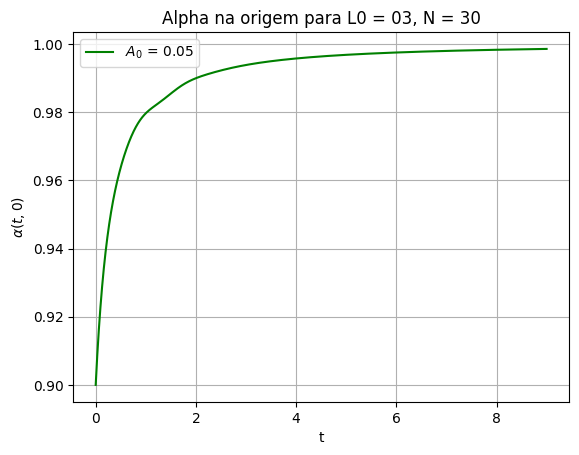

In [9]:
# Searching for critical amplitude:
#%matplotlib notebook

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 03, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

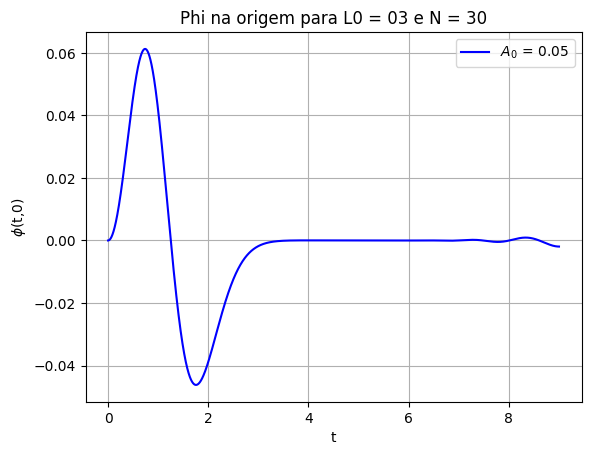

In [10]:
#matplotlib notebook

plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 03 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 
plt.show

In [11]:
# Erro L2 of Hamiltonian constraint

#plt.plot(t1,L2HC, label = " $A_0$ = {:}".format(A0))
#plt.yscale("log")
#plt.ylabel("log(L2HC)")
#plt.xlabel("t")
#plt.title("log(L2HC) para $N = 600$, $L_0 = 5$")
#plt.legend()

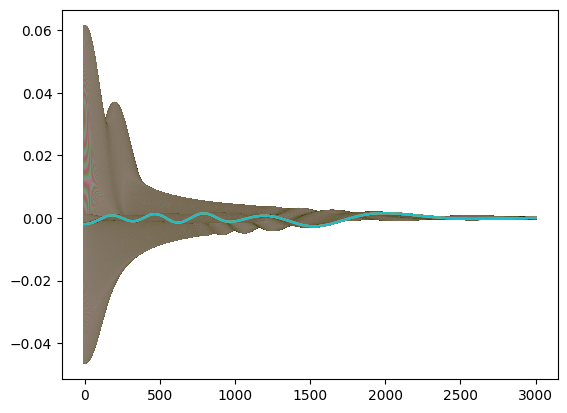

In [12]:
for i in range(It):
    plt.plot(phi_set[i])

NameError: ignored

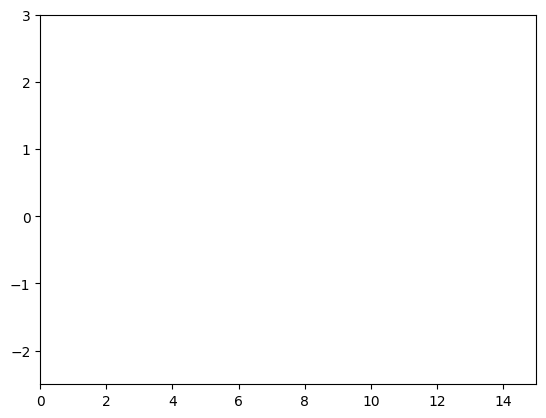

In [13]:
# 2D Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-2.5, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot


def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=1, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# Plot 3D for Phi:

from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook
rplot = np.linspace(0.000001,80,M)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = phi_set[6500]
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
ax2.axis('off')

plt.show()

In [ ]:
# 3D animation plot for Phi:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

#%matplotlib notebook

rplot = np.linspace(0.000001,80,M)
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.ylim(-2.5, 3)
ax2 = fig.add_subplot(122, projection='3d')

xn = np.outer(rplot, np.cos(theta))
yn = np.outer(rplot, np.sin(theta))
zn = np.zeros_like(xn)

def update_plot(i):
    ax1.clear()
    ax2.clear()

    y = phi_set[i]
    x = rplot

    for j in range(len(x)):
        zn[j,:] = np.full_like(zn[0], y[j])

    ax1.plot(x, y)
    ax2.plot_surface(xn, yn, zn, cmap = plt.cm.coolwarm)
    ax2.axis('off')

 
    
ani = animation.FuncAnimation(fig, update_plot, frames=len(phi_set), interval=1)
ani.save("animation_colapse_N500_CG_2grids.mp4")

#for i in range(0, len(phi_set), 2):
#    ani.frame_seq = ani.new_frame_seq(slice(i, i+1))
#    ani.save(f"plot_{i}.png")


#HTML(ani.to_html5_video())

plt.show()

